## import os 

In [1]:
import os
os.listdir()

['train.csv',
 'DataCleaning.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

# load

In [3]:
df = pd.read_csv('train_FeatureSelected.csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(122775, 16)


,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0706B21,MLPAP_TI-0716A03,MLPAP_TI-0716A05,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TI-0706B01,MLPAP_TRC-0610.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
0,-0.883078,0.436520,0.527857,2.885848,0.448321,0.677295,0.881300,0.796872,0.633992,3.036852,3.099501,0.608934,-2.619894,-1.015438,-0.088287,0.914125
1,-0.883078,0.436520,0.527857,2.885848,0.448321,0.677122,0.881648,0.797089,0.633992,2.864041,3.272350,0.447358,-2.614712,-0.982340,-0.088287,0.919765
2,-0.883078,0.436830,0.527857,2.885848,0.448321,0.677619,0.881571,0.796987,0.633992,3.006620,3.596289,-0.634915,-2.617016,-0.975999,-0.088287,0.926346
3,-1.508446,0.411821,0.395807,2.856863,0.468480,0.641630,0.853312,0.763786,0.601863,1.710665,3.361869,0.769126,-2.612469,-0.840360,-0.088287,0.906781
4,-1.443246,0.412131,0.395807,2.882331,0.468480,0.642077,0.853810,0.764300,0.603356,1.822449,3.029603,0.528846,-2.620588,-0.868595,-0.088287,0.926688


# scale

In [4]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop('target',axis=1).columns.tolist()
y_col = 'target'

sc = MinMaxScaler()
df[x_col] = sc.fit_transform(df[x_col])

df.head()

,MLPAP_TI-0706B10,MLPAP_TI-0706B15,MLPAP_TI-0706B21,MLPAP_TI-0716A03,MLPAP_TI-0716A05,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TI-0706B01,MLPAP_TRC-0610.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_FR-0755.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target
0,0.803927,0.968352,0.990723,1.000000,0.977663,0.693540,0.999851,0.999915,1.000000,0.870333,0.564397,0.517157,0.091998,0.909638,0.145161,0.914125
1,0.803927,0.968352,0.990723,1.000000,0.977663,0.693497,1.000000,1.000000,1.000000,0.855041,0.572776,0.504635,0.092996,0.910421,0.145161,0.919765
2,0.803927,0.968465,0.990723,1.000000,0.977663,0.693619,0.999967,0.999960,1.000000,0.867657,0.588480,0.420763,0.092552,0.910572,0.145161,0.926346
3,0.757022,0.959309,0.983765,0.999050,0.981970,0.684815,0.987892,0.986978,0.988840,0.752979,0.577116,0.529571,0.093428,0.913783,0.145161,0.906781
4,0.761912,0.959423,0.983765,0.999885,0.981970,0.684924,0.988105,0.987179,0.989358,0.762871,0.561009,0.510950,0.091865,0.913115,0.145161,0.926688


# stack

In [5]:
step = 15
X_lst,y_lst = [],[]
x_col = df.drop('target',axis=1).columns.tolist()
y_col = 'target'

In [6]:
for i in tqdm(range(0,len(df)-step)):
    X_lst.append(df.iloc[i:i+step][x_col])
    y_lst.append(df.iloc[i+step][y_col])

# Visualization

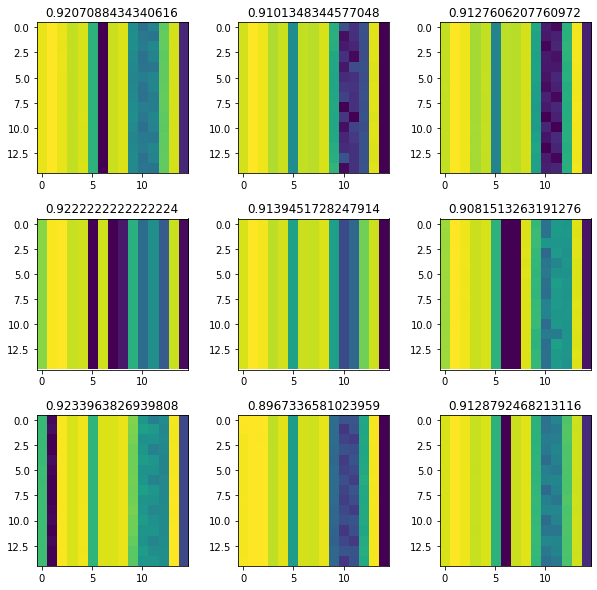

In [7]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    idx = np.random.randint(0,len(X_lst))
    plt.imshow(X_lst[idx])
    plt.title(y_lst[idx])

# split

In [8]:
from sklearn.model_selection import train_test_split

# reshape
X = np.array([i.values for i in X_lst])
X = X.reshape(-1,step,len(x_col),1)
y = np.array([i for i in y_lst])

# split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)
X_val, X_test ,y_val ,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 7)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(85932, 15, 15, 1) (85932,)
(18414, 15, 15, 1) (18414,)
(18414, 15, 15, 1) (18414,)


# Model

In [9]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam
import warnings;warnings.simplefilter('ignore')

Using TensorFlow backend.
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/d

In [10]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X[0].shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 15, 15, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [11]:
model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=["mse"])

In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=10,mode='min')

# fit

In [13]:
history = model.fit(X_train,y_train,
                    batch_size = 256,
                    epochs = 100,
                    validation_data = (X_val,y_val),
                    verbose = 1,
                    callbacks = [es])

Train on 85932 samples, validate on 18414 samples
Epoch 1/100
85932/85932 [==============================] - 5s 56us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 1.9327e-04 - val_mean_squared_error: 1.9327e-04
Epoch 2/100
85932/85932 [==============================] - 2s 18us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 1.4687e-04 - val_mean_squared_error: 1.4687e-04
Epoch 3/100
85932/85932 [==============================] - 2s 18us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 1.2967e-04 - val_mean_squared_error: 1.2967e-04
Epoch 4/100
85932/85932 [==============================] - 2s 18us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 1.1738e-04 - val_mean_squared_error: 1.1738e-04
Epoch 5/100
85932/85932 [==============================] - 2s 19us/step - loss: 8.7166e-04 - mean_squared_error: 8.7166e-04 - val_loss: 1.1485e-04 - val_mean_squared_error: 1.1485e-04
Epoch 6/100
85932/85932 [==============================] - 2s 

85932/85932 [==============================] - 1s 17us/step - loss: 8.2260e-05 - mean_squared_error: 8.2260e-05 - val_loss: 7.5717e-05 - val_mean_squared_error: 7.5717e-05
Epoch 46/100
85932/85932 [==============================] - 1s 17us/step - loss: 7.8637e-05 - mean_squared_error: 7.8637e-05 - val_loss: 6.5914e-05 - val_mean_squared_error: 6.5914e-05
Epoch 47/100
85932/85932 [==============================] - 1s 17us/step - loss: 7.8320e-05 - mean_squared_error: 7.8320e-05 - val_loss: 6.9217e-05 - val_mean_squared_error: 6.9217e-05
Epoch 48/100
85932/85932 [==============================] - 1s 17us/step - loss: 7.6274e-05 - mean_squared_error: 7.6274e-05 - val_loss: 7.0294e-05 - val_mean_squared_error: 7.0294e-05
Epoch 49/100
85932/85932 [==============================] - 1s 17us/step - loss: 7.6073e-05 - mean_squared_error: 7.6073e-05 - val_loss: 7.0505e-05 - val_mean_squared_error: 7.0505e-05
Epoch 50/100
85932/85932 [==============================] - 1s 17us/step - loss: 7.4526e

85932/85932 [==============================] - 1s 17us/step - loss: 6.2661e-05 - mean_squared_error: 6.2661e-05 - val_loss: 6.0751e-05 - val_mean_squared_error: 6.0751e-05
Epoch 90/100
85932/85932 [==============================] - 1s 17us/step - loss: 6.1966e-05 - mean_squared_error: 6.1966e-05 - val_loss: 6.2039e-05 - val_mean_squared_error: 6.2039e-05
Epoch 91/100
85932/85932 [==============================] - 1s 17us/step - loss: 6.2051e-05 - mean_squared_error: 6.2051e-05 - val_loss: 6.2165e-05 - val_mean_squared_error: 6.2165e-05
Epoch 92/100
85932/85932 [==============================] - 2s 18us/step - loss: 6.1851e-05 - mean_squared_error: 6.1851e-05 - val_loss: 6.0558e-05 - val_mean_squared_error: 6.0558e-05
Epoch 93/100
85932/85932 [==============================] - 1s 17us/step - loss: 6.1696e-05 - mean_squared_error: 6.1696e-05 - val_loss: 6.1959e-05 - val_mean_squared_error: 6.1959e-05
Epoch 94/100
85932/85932 [==============================] - 1s 17us/step - loss: 6.1927e

# eval

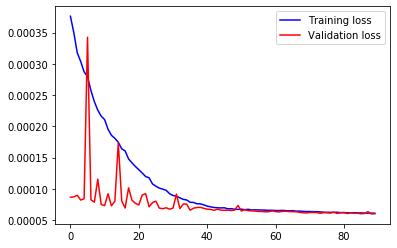

In [18]:
n = 10
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

In [15]:
from sklearn.metrics import r2_score,mean_squared_error

y_pred = model.predict(X_test).ravel()
print(round(r2_score(y_test,y_pred),4))
print(round(mean_squared_error(y_test,y_pred),4))

0.3511
0.0001


In [16]:
print(round(df['target'].std(),4))

0.0096
